## Adaboost,Gradient Boost ,XGboost Implementation

#### [Boosting in short](https://medium.com/@brijesh_soni/understanding-boosting-in-machine-learning-a-comprehensive-guide-bdeaa1167a6)

#### [sklearn ensemble](https://scikit-learn.org/stable/modules/ensemble.html)

#### [AdaBoost in detail](https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/)

#### [Gradient Boost in detail](https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/)

#### [XGBoost in detail](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/)

In [51]:
from sklearn.datasets import make_classification 
X,y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)

<Axes: >

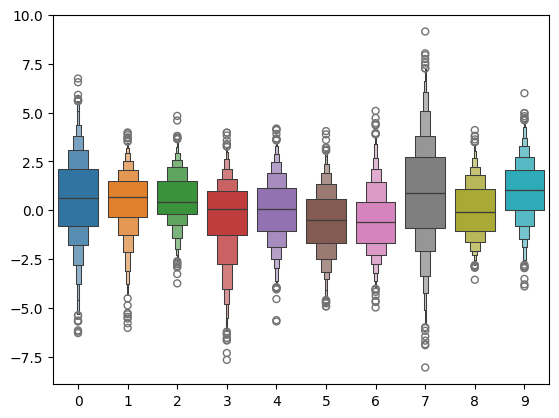

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxenplot(X)

In [53]:
import pandas as pd

# Convert the numpy array to a pandas DataFrame
X_df = pd.DataFrame(X)
X_df['target'] = y

# Assuming X_df is your DataFrame
Q1 = X_df.quantile(0.25)
Q3 = X_df.quantile(0.75)
IQR = Q3 - Q1

# Define a mask for values that are NOT outliers
mask = ~((X_df < (Q1 - 1.5 * IQR)) | (X_df > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to X_df
X_clean = X_df[mask]


<Axes: >

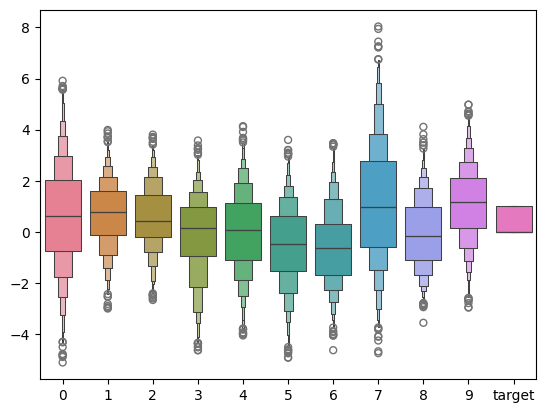

In [54]:
sns.boxenplot(X_clean)

In [55]:
import warnings 
warnings.filterwarnings('ignore')

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_test , X_train , y_test , y_train = train_test_split(X, y, test_size = 0.33, random_state = 1)

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
adaboost.score(X_test, y_test)
y_pred = adaboost.predict(X_test)

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

adaboost = AdaBoostClassifier()
y_clean = X_clean['target']
X_clean.drop('target', axis=1, inplace=True)
X_train , X_test , y_train , y_test = train_test_split(X_clean, y_clean, test_size = 0.33, random_state = 1)
adaboost.fit(X_train, y_train)
adaboost.score(X_test, y_test)
y_pred = adaboost.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[295  51]
 [ 43 281]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       346
           1       0.85      0.87      0.86       324

    accuracy                           0.86       670
   macro avg       0.86      0.86      0.86       670
weighted avg       0.86      0.86      0.86       670

0.8597014925373134
0.8289473684210527
[[126  29]
 [ 23 126]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       155
           1       0.81      0.85      0.83       149

    accuracy                           0.83       304
   macro avg       0.83      0.83      0.83       304
weighted avg       0.83      0.83      0.83       304



In [57]:
gradient = GradientBoostingClassifier()
X_test , X_train , y_test , y_train = train_test_split(X, y, test_size = 0.33, random_state = 1)
gradient.fit(X_train, y_train)
gradient.score(X_test, y_test)
y_pred = gradient.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8940298507462686


In [58]:
gradient = GradientBoostingClassifier()
X_train , X_test , y_train , y_test = train_test_split(X_clean, y_clean, test_size = 0.33, random_state = 1)
gradient.fit(X_train, y_train)
gradient.score(X_test, y_test)
y_pred = gradient.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9046052631578947


In [59]:
xgboost = xgb.XGBClassifier()
X_test , X_train , y_test , y_train = train_test_split(X, y, test_size = 0.33, random_state = 1)
xgboost.fit(X_train, y_train)
print(xgboost.score(X_test, y_test))
y_pred = xgboost.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

xgboost = xgb.XGBClassifier()
X_train , X_test , y_train , y_test = train_test_split(X_clean, y_clean, test_size = 0.33, random_state = 1)
xgboost.fit(X_train, y_train)
print(xgboost.score(X_test, y_test))
y_pred = xgboost.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9074626865671642
0.9074626865671642
[[312  34]
 [ 28 296]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       346
           1       0.90      0.91      0.91       324

    accuracy                           0.91       670
   macro avg       0.91      0.91      0.91       670
weighted avg       0.91      0.91      0.91       670

0.8980263157894737
0.8980263157894737
[[137  18]
 [ 13 136]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       155
           1       0.88      0.91      0.90       149

    accuracy                           0.90       304
   macro avg       0.90      0.90      0.90       304
weighted avg       0.90      0.90      0.90       304



### Boosting algorithms are not completely immune to outliers, but some are more robust to outliers than others. Here's a brief overview:

1. **AdaBoost**: AdaBoost is sensitive to outliers because it tries to fit each new predictor to the misclassified instances of the previous predictor, which can cause it to focus too much on the outliers.

2. **Gradient Boosting**: Gradient Boosting is also sensitive to outliers. It builds each new tree to correct the residuals errors of the previous tree, so outliers can have a large effect on the model.

3. **XGBoost**: XGBoost is more robust to outliers than AdaBoost and Gradient Boosting. It uses a more regularized model formalization to control over-fitting, which makes it less sensitive to outliers.

However, none of these algorithms are completely immune to outliers. If your dataset has significant outliers, it's often a good idea to handle them during your data preprocessing stage before training your model. This could involve removing them, transforming them, or using a robust scaling method.

In [63]:
## Regression Task
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xb
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

from sklearn.metrics import mean_squared_error , r2_score
print(mean_squared_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))

gradient = GradientBoostingRegressor()
gradient.fit(X_train, y_train)
gradient.score(X_test, y_test)
y_pred = gradient.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))

xgboost = xb.XGBRegressor()
xgboost.fit(X_train, y_train)
print(xgboost.score(X_test, y_test))
y_pred = xgboost.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))

7978.072876518973
r2 score: 0.7693710566207872
3065.0404594261304
r2 score: 0.9113962665529802
0.8627007789485741
4749.547803444924
r2 score: 0.8627007789485741


<Axes: >

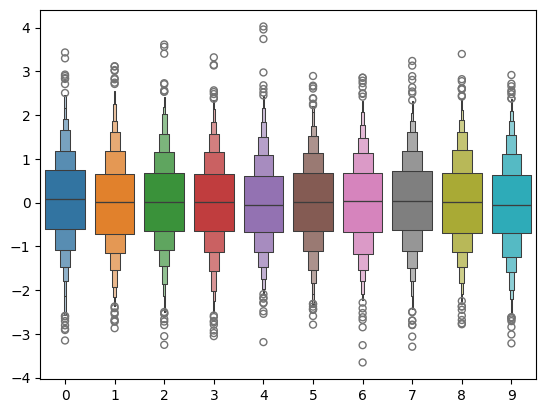

In [61]:
sns.boxenplot(X)

In [72]:
X_df = pd.DataFrame(X)
X_df['target'] = y


In [68]:
Q1 = X_df.quantile(0.25)
Q3 = X_df.quantile(0.75)
IQR = Q3 - Q1

# Define a mask for values that are NOT outliers
mask = ~((X_df < (Q1 - 1.5 * IQR)) | (X_df > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to X_df
X_clean = X_df[mask]

<Axes: >

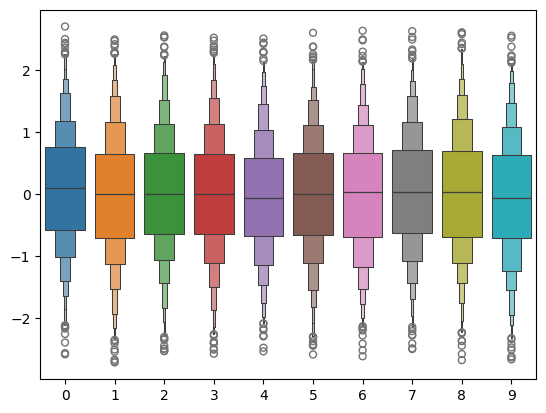

In [70]:
y = X_clean['target']
X = X_clean.drop('target', axis=1)
sns.boxenplot(X)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))

gradient = GradientBoostingRegressor()
gradient.fit(X_train, y_train)
gradient.score(X_test, y_test)
y_pred = gradient.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))

xgboost = xb.XGBRegressor()
xgboost.fit(X_train, y_train)
print(xgboost.score(X_test, y_test))
y_pred = xgboost.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))


6405.716901922391
r2 score: 0.8108141969599292
2172.835997103088
r2 score: 0.9358276787313288
0.8922279831528945
3649.095327335664
r2 score: 0.8922279831528945
